<a href="https://colab.research.google.com/github/marzier/CSC481/blob/main/ramirez_nicholas_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



In [4]:
data = pd.read_csv('gila_river.csv')

In [5]:
data.head()


,y(t-1),y(t-2),y(t-3),y(t)
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [6]:
data.shape

(1034, 4)

In [7]:
X = data.drop(columns='y(t)')
y = data['y(t)']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2, random_state=42)


In [9]:
#standardization of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
mlp = MLPRegressor(hidden_layer_sizes=(64,64), max_iter=3000)


In [11]:
mlp.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [12]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [13]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)

In [14]:
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")



Training MSE: 59826.85898281497
Testing MSE: 25299.653966381855


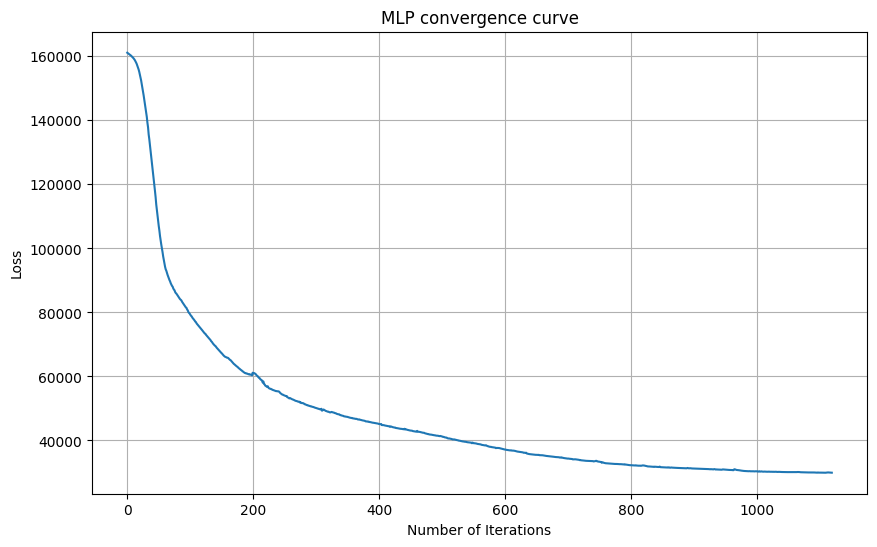

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title("MLP convergence curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


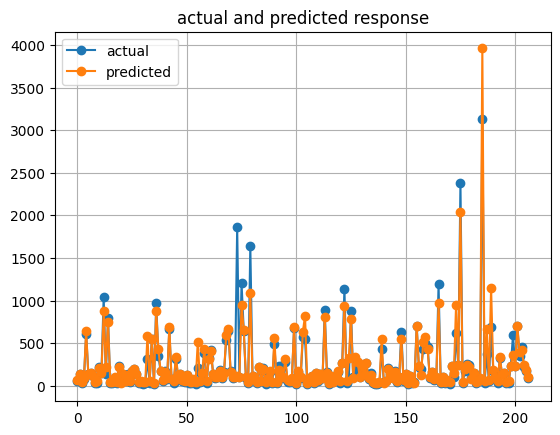

In [20]:
t = range(len(Y_test))
t

plt.plot(t,Y_test, label='actual', linestyle='-', marker='o')
plt.plot(t,y_test_pred, label='predicted', linestyle='-', marker='o')
plt.title('actual and predicted response')
plt.legend()
plt.grid(True)
plt.show()

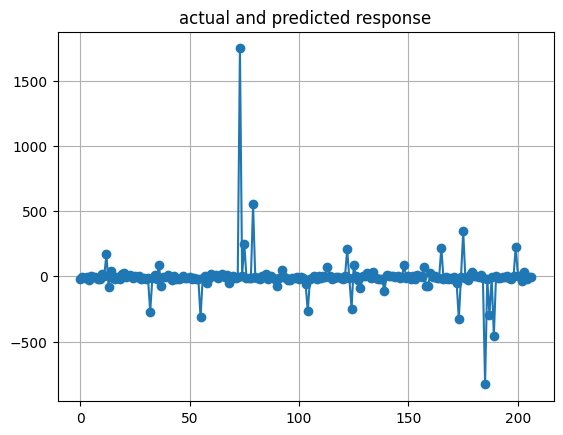

In [22]:
t = range(len(Y_test))
t

plt.plot(t,Y_test - y_test_pred, label='actual', linestyle='-', marker='o')
plt.title('actual and predicted response')
plt.grid(True)
plt.show()